<center><h1> Fourier Transform and Image Processing <h1> </center>

## 1. Introduction

The Fourier transform is a fundamental tool in mathematics, mathematical physics, and signal and image processing. The development of fast algorithms for Fourier analysis, known as FFT, has significantly impacted science and technology. In this context, the Polar Fourier transform emerges as a valuable concept, particularly when the set of frequencies is examined in polar coordinates. [This paper](https://elad.cs.technion.ac.il/wp-content/uploads/2018/02/30_PolarFFT_ACHA.pdf) explores the Polar Fourier transform and its application to digital data, addressing the challenge of finding a fast algorithm, or Polar FFT, for discrete data. Despite skepticism in the literature, the authors propose a well-suited Polar FT for digital data, emphasizing its accuracy, speed, stability, vectorizability, and nonexpansivity. This report outlines the contributions of the paper, its relation to existing literature, and the advantages of the proposed Polar FFT, setting the stage for a detailed exploration of the methodology, analysis, and results in subsequent sections. [1]

## 2. Pseudo-Polar Fourier Transform and Its Application

### 2.1 Pseudo-Polar Coordinate System

In this paper, we introduce a concept of a Polar Fourier Transform (Polar FT) designed for digital data. This approach aligns with the continuum Polar FT concept, offering high accuracy, speed, and broad applicability. The Polar grid of frequencies, denoted as ξp,q = {ξx[p, q], ξy[p, q]}, is defined within the circle inscribed in the fundamental region ξ ∈ [−π, π)². Given digital Cartesian data represented as $f[i_1, i_2]$, the Polar FT is defined as the collection of samples {F(ξp,q)}, where F(ξp,q) represents a trigonometric polynomial. This methodology ensures fidelity to the continuous Polar FT concept while being well-suited for digital datasets, demonstrating both accuracy and efficiency.

$F(\xi_{p,q}) = \sum_{i_1=0}^{N-1} \sum_{i_2=0}^{N-1} f[i_1, i_2] \exp\left(-i \left(i_1\xi_x[p, q] - i_2\xi_y[p, q]\right)\right)$

The pseudo-Polar grid defines points in the frequency domain, categorized into basically vertical (BV) and basically horizontal (BH) subsets. The BV points have vertical frequencies defined by ξy = π/N and horizontal frequencies given by ξx = ξy · 2m/N. The BH points, on the other hand, have horizontal frequencies defined by ξx = π/N and vertical frequencies given by ξy = ξx · 2m/N.

Key properties of the pseudo-Polar grid:
- Points are at intersections of concentric squares with angularly nonequispaced rays.
- The grid is Polar-like, with concentric squares replacing circles and equispaced rays in slope replacing equispaced rays in angle.
- Points on BV and BH subsets are organized on lines with angles ranging from -π to π, providing uniform spread along each line.
- Redundancy of points on the outer-most square is addressed due to the periodic nature of the Fourier transform.
- BV and BH data processing can be done in parallel, utilizing a data structure of two simple 2D arrays.

### 2.2 Fast Forward Transform

The fast forward transform on the pseudo-Polar BV grid points can be achieved through simple 1D-FFT operations. The complexity is outlined in Theorem 1 of the paper[1], indicating that the entire computation requires 140N^2 logN.

### 2.3 Fast Inverse Transform and Quasi-Parseval Relationship

The pseudo-Polar FFT can be inverted using the method of least-squares (LS). The inversion process is detailed in Theorem 2 [1], demonstrating that the adjoint pseudo-Polar FFT can be computed with the same complexity as the forward transform, requiring O{N² log(N)} operations.


## 3. From Pseudo-Polar to Polar

In a manner similar to the Cartesian-based USFFT approach, we propose computing Polar-FT values using a different grid, leveraging a fast algorithm, and transitioning to Polar coordinates through interpolation. Unlike using the Cartesian grid initially, we opt for the pseudo-Polar grid from the previous section. This choice, being closer to Polar coordinates, is expected to enhance accuracy, reducing oversampling requirements. Apart from proximity, another crucial advantage is the ability to perform interpolations via pure 1D operations without sacrificing accuracy, showcasing the superiority over traditional Cartesian-based USFFT methods.

### 3.1 Pseudo-Polar–Polar: Grid Conversion

We establish the Polar coordinate system based on the pseudo-Polar one. Starting with the pseudo-Polar frequency sampling points, we perform two operations to obtain Polar coordinates: 

1. **Rotate the rays:** Achieved by adjusting the term in the pseudo-Polar grid, leading to equispaced angular sampling.
2. **Circle the squares:** Involves dividing both ξx and ξy based on the angle, resulting in concentric circles as required in the Polar system.

These operations, depicted as interpolation stages, involve 1D operations along lines or rays, ensuring high interpolation accuracy. Considering a specific row with fixed ξy, the underlying function for interpolation takes a simple form, implying high accuracy even with low oversampling. The subsequent steps involve 1D operations along rays, leading to band-limited functions conducive to accurate interpolation.

### 3.2 Overview on the Proposed Scheme

The proposed Polar-FFT involves computing the Fourier transform over a pseudo-Polar grid, followed by two interpolation stages. To achieve high accuracy, oversampling of the pseudo-Polar grid is crucial. The overall algorithm complexity is influenced by the pseudo-Polar FFT, which is more complex than the Cartesian grid 2D-FFT. In terms of memory requirements, overcomplete pseudo-Polar FFT requires 4N²SP float-values. The scheme allows for memory-efficient operations, particularly in 1D interpolations.

### 3.3 Disk Band-Limited Support as Regularization

A challenge in using the Polar coordinate system with digitally sampled data arises from the square shape of the frequency domain. To address this, assuming no content in nonsampled corners and limiting the frequency domain inside a disk of radius π proves beneficial. The inversion of the Polar-FFT requires implementing the inverse pseudo-Polar FFT, assuming over-completeness in the Polar grid for stability.


## 4. Analysis of the Polar FFT algorithm

The analysis compares the performance of the USFFT and Polar-FFT algorithms using a scaled-down Lena image. Emphasis is placed on oversampling effects. For the Cartesian-based USFFT, 2D Hermite interpolation with a 2 × 2 support is utilized. The Polar-FFT employs Hermite interpolation with a 2-sample support in the first stage and a piecewise cubic spline in the second. Results indicate that, with appropriate oversampling choices, Polar-FFT outperforms USFFT under various error measures.

Frequency domain analysis reveals that Cartesian-USFFT concentrates errors at the origin, while Polar-FFT errors are distributed across frequencies with smaller magnitudes. Worst-case scenarios highlight Polar-FFT's superior performance in maximizing errors at specific frequency locations. Eigenspace analysis consistently demonstrates that the Polar-FFT outperforms the USFFT method in worst-case error scenarios, both in direct optimization approaches and relative approaches with or without support constraints.

## 5. Exploring the Sample Script

### 5.1 Understanding the Sample Script

The macro below loads an image processing package, displays loaded packages to make sure we have image package up and running, and then the macro changes the directory to 'PolarLab,' and adds this directory to the search path. This facilitates access to image processing functions and resources stored in the 'PolarLab' directory for subsequent MATLAB operations.

In [ ]:
% Load the image processing package
pkg load image

% Display a list of loaded packages
pkg list

% Copy and extract 'Polarlab'
system("cp /work/5P10/Lectures/PolarLab.zip ./");
system("unzip -x -q -o -d PolarLab PolarLab.zip");

% Change the current directory to 'PolarLab'
cd PolarLab

% Add the 'PolarLab' directory to the MATLAB search path
addpath("PolarLab")


Package Name  | Version | Installation directory
--------------+---------+-----------------------
     control  |   3.6.1 | .../share/octave/api-v58/packages/control-3.6.1
   dataframe  |   1.2.0 | .../share/octave/api-v58/packages/dataframe-1.2.0
       image *|  2.14.0 | .../.local/share/octave/api-v58/packages/image-2.14.0
     matgeom  |   1.2.3 | .../share/octave/api-v58/packages/matgeom-1.2.3
       optim  |   1.6.2 | .../.local/share/octave/api-v58/packages/optim-1.6.2
      signal  |   1.4.5 | .../.local/share/octave/api-v58/packages/signal-1.4.5
  statistics  |   1.6.0 | .../share/octave/api-v58/packages/statistics-1.6.0
      struct  |  1.0.18 | .../share/octave/api-v58/packages/struct-1.0.18


This MATLAB script generates and analyzes two square pulses in the time domain. The first section defines and plots the time-domain signals, and the second section computes and plots their magnitude spectra (power spectrum). The third section computes and plots the phase spectra (angle of Fourier Transform). The script effectively visualizes the time-domain signals, their frequency characteristics, and phase information, providing insights into the behavior of square pulses in both the time and frequency domains.


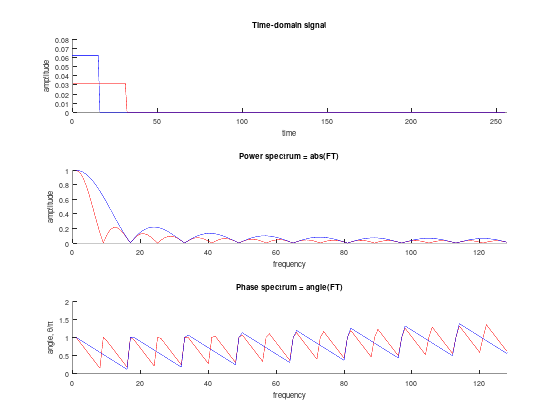

In [3]:
% Set the length of the signal
N = 256;            % Number of samples
x = [0:N-1];        % Time vector

% Define two square pulses
y1 = ifelse((x < 32), 1/32, 0);  % Define the first square pulse
y2 = ifelse((x < 16), 1/16, 0);  % Define the second square pulse

% Plot the time-domain signal
subplot(3, 1, 1)
hold on;
plot(x, y1, 'r-');   % Plot the first pulse in red
plot(x, y2, 'b-');   % Plot the second pulse in blue
xlim([0 N]);         % Set x-axis limits
xlabel("time");      % Label for x-axis
ylabel("amplitude");  % Label for y-axis
title("Time-domain signal")  % Title of the subplot
hold off;

% Compute and plot the magnitude spectrum (absolute value of FT)
f1 = fft(y1);       % Compute the Fourier transform of the first pulse
f2 = fft(y2);       % Compute the Fourier transform of the second pulse

subplot(3, 1, 2)
hold on;
plot(abs(f1), 'r-');  % Plot the magnitude spectrum of the first pulse in red
plot(abs(f2), 'b-');  % Plot the magnitude spectrum of the second pulse in blue
xlim([0 N/2]);        % Set x-axis limits
xlabel("frequency");  % Label for x-axis
ylabel("amplitude");  % Label for y-axis
title("Power spectrum = abs(FT)")  % Title of the subplot
hold off;

% Compute and plot the phase spectrum (angle of FT)
subplot(3, 1, 3)
hold on;
p1 = angle(f1);    % Compute the phase spectrum of the first pulse
p2 = angle(f2);    % Compute the phase spectrum of the second pulse
p1 += pi;          % Adjust phase values for better visualization
p2 += pi;          % Adjust phase values for better visualization
p1 += ifelse(p1 > 2 * pi, -2 * pi, 0);  % Ensure phase values are within [-pi, pi]
p2 += ifelse(p2 > 2 * pi, -2 * pi, 0);  % Ensure phase values are within [-pi, pi]

plot(p1/pi, 'r-');  % Plot the phase spectrum of the first pulse in red
plot(p2/pi, 'b-');  % Plot the phase spectrum of the second pulse in blue
xlim([0 N/2]);      % Set x-axis limits
xlabel("frequency");  % Label for x-axis
ylabel("angle, \\theta/\\pi");  % Label for y-axis
title("Phase spectrum = angle(FT)")  % Title of the subplot
hold off;


### 5.2 Observations and Intuition

This is how changes in time-domain pulses affect Fourier Transform:

**Width of Pulses (Duration):** Increasing the width of a pulse will spread its energy across a wider range of frequencies in the Fourier transform. Smaller pulse widths concentrate more energy at higher frequencies.

**Position of Pulses (Time Shift):** Shifting the position of a pulse in the time domain corresponds to a phase shift in the frequency domain. This is reflected in the phase spectrum.

**Shape of Pulses (Windowing Functions):** The choice of windowing functions affects the shape of the spectrum. Different window functions can impact the sidelobe levels and frequency resolution in the Fourier transform.

## 6. Polar Fourier Transform on Test Images

### 6.1 Creating Test Images

The provided macro generates a test image represented by a 2D cosine wave with a Gaussian envelope. It creates a grid of coordinates, computes the distance of each point from the center, and uses this information to generate a cosine wave pattern. The resulting image is displayed in a plot with the axis centered around the origin, which is described by the formula:

<center> 

$\cos\left(\frac{2 \pi r}{16}\right) \cdot e^{-\frac{r^2}{2 \cdot 64^2}}$ 

</center>

- **Frequency:**
  The term $\cos\left(\frac{2 \pi r}{16}\right)$ represents a cosine wave with a frequency determined by the factor $\frac{2 \pi}{16} $. The $ r $ in the argument of the cosine function indicates that the frequency is radial; it varies as a function of the radial distance from the center $ r $.

- **Decay Factor and Amplitude:**
  The term $e^{-\frac{r^2}{2 \cdot 64^2}}$ introduces a Gaussian envelope. This term governs the decay of amplitude with radial distance. The quantity $\frac{r^2}{2 \cdot 64^2}$ in the exponent is a measure of the radial distance squared normalized by $2 \cdot 64^2$. As $ r $ increases, the exponential term decreases, causing the amplitude of the cosine wave to decay radially. The larger the value of $r$, the smaller the amplitude, resulting in a smooth radial decay pattern.


 

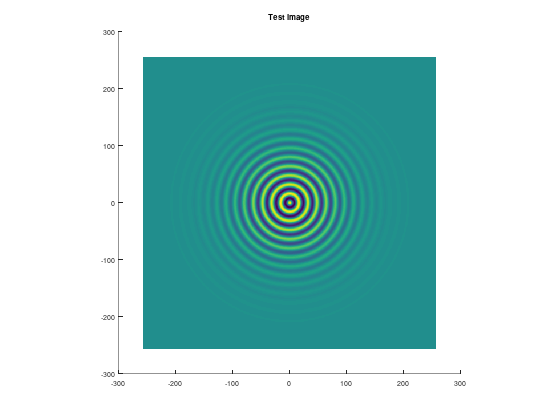

In [4]:
N = 256;
% Create a 2D grid of coordinates (x, y)
x=[-N:N-1];
y=x';                             
r = sqrt((x).^2 + (y).^2);                                    % Calculate the distance from the center
cos_wave = cos(2 * pi * r / 16) .* exp(-r.^2 / (2 * 64^2));   % Generate a 2D cosine wave with Gaussian envelope
I = cos_wave;                                                 % Assign the generated image to variable I


% Display cosine test figure
figure;                                                     % Create a new figure
hold on;                                                    % Hold the current axis for multiple plots
imagesc(x, y,I);                                            % Display the image with coordinates centered around the origin
axis("xy");                                                 % Set axis scaling to be equal along both axes
title("Test image");                                        % Set the title of the plot
pbaspect([1 1 1]);                                          % Set the aspect ratio of the plot
hold off;                                                   % Release the hold on the current axis


### 6.2 Performing Polar Fourier Transform

The MATLAB code generates and plots a test image represented by a 2D cosine wave with a Gaussian envelope using the above formula. It uses three subplots to illustrate different aspects: the original image, a 3D mesh plot of the cosine wave, and the amplitude plot obtained through the PPFFT (Pseudo-Polar FFT) algorithm with specified oversampling. The PPFFT output is reshuffled to present the plot with r=0 and theta=0 at the lower left corner.

We can expect the plot to reveal a pattern reminiscent of a cosine wave, serving as the primary structural element. This wave is a consequence of combining a cosine function with a Gaussian envelope. The mesh plot should demonstrate a gradual decrease in amplitude as the distance from the center increases, indicative of a radial decay. This attenuation is influenced by the Gaussian envelope, contributing to a smooth reduction in amplitude with increasing radial distance. Radial symmetry is likely to be evident in the mesh plot, mirroring the radial decay pattern from the center. The amplitude of the cosine wave should diminish smoothly as one moves away from the center, maintaining radial symmetry. Depending on the orientation or phase of the cosine wave, the mesh plot may exhibit angular modulation. The mesh plot should visually convey the frequency components of the cosine wave through oscillations. These components, corresponding to the peaks in the polar plot, provide insights into the spatial frequency content of the original image.

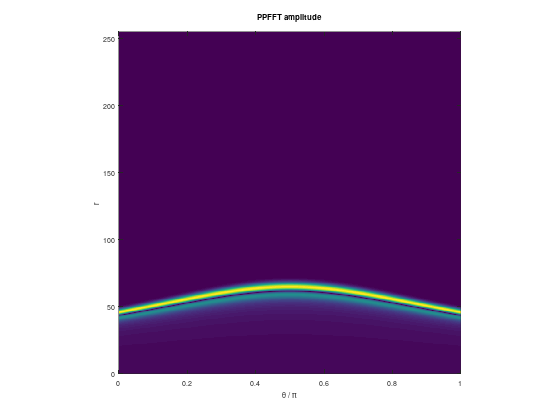

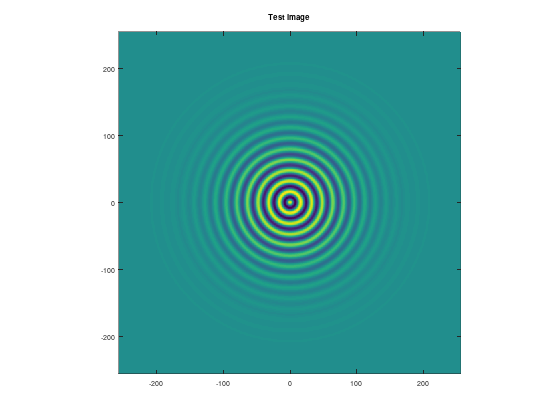

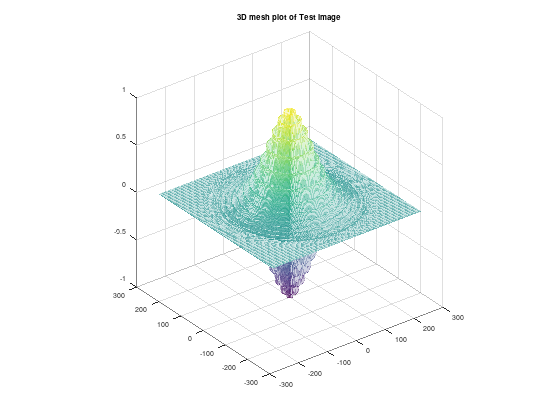

In [5]:
N = 256;
oversample = 3;                                      % PPFFT setting, useful range = 1..5
% Create a 2D grid of coordinates (x, y)
x=[-N:N-1];
y= x';                   

% Real 2N x 2N data on input implies a zero imaginary 2N x 2N,
% and then PPFFT produces four identical quadrants NxN each; 
% take one and reshuffle so that r=0, theta=0 is at the lower left of the plot
t_shuffle = [oversample * 2 * N:-1:1];
r_shuffle = [oversample * 2 * N:-1:oversample * N];

r = sqrt((x).^2 + (y).^2);                       % Calculate the distance from the center
cos_wave = cos(2 * pi * r / 16) .* exp(-r.^2 / (2 * 64^2));  % Generate a 2D cosine wave with Gaussian envelope
I = cos_wave;                                                % Assign the generated image to variable I

figure;
imagesc(x,y,I);  % Display the image with coordinates centered around the origin
axis("xy");                % Set axis scaling to be equal along both axes
title("Test image");       % Set the title of the plot
pbaspect([1 1 1]);         % Set the aspect ratio of the plot

figure;
mesh(x, y, I);  % Create a 3D mesh plot of the cosine wave
axis("xy"); 
title("3D mesh plot of Test image"); 
pbaspect([1 1 1]);

I_ft = PPFFT(I, oversample, oversample);  % Perform PPFFT on z with oversampling
I_p = abs(I_ft(r_shuffle, t_shuffle));    % Extract amplitude information and reshuffle

figure;
imagesc(linspace(0,1,N),[0:N-1],I_p);  % Display the PPFFT amplitude plot
axis("xy");                 
title("PPFFT amplitude");   
xlabel("\\theta / \\pi"); 
ylabel("r"); 
pbaspect([1 1 1]);

The initial guess for the expected Fourier Transform is consistent with the theoretical understanding of a cosinusoidal wave with a radial Gaussian envelope. The PPFFT is expected to reveal the radial frequency components and the decay due to the Gaussian envelope.

## 7. Exploring Parameters of Test Images

### 7.1 Varying Parameters

This code generates a family of test images representing a 2D cosine wave with a Gaussian decay while varying the rate of decay. The primary function, `generate_test_image`, creates a clean test image by combining a cosine wave and a Gaussian decay. Noise is then added to make the image more complex and interesting. Another function, `get_interesting_aspect`, determines the interesting aspect based on the decay rate. The interesting aspects are categorized as 'Frequency Concentration,' 'Intermediate,' or 'High Frequency Concentration' depending on the value of the decay rate. The script iterates over different decay rates and displays the generated test images, their 3D mesh plots, and the amplitude plots obtained through the Psuedo Polar Fast Fourier Transform (PPFFT). The displayed plots provide insights into how the decay rate affects the visual characteristics of the test images and their frequency spectra.

Decay rate: 0.1
Interesting Aspects:
Frequency Concentration
Decay rate: 0.5
Interesting Aspects:
Frequency Concentration
Decay rate: 1
Interesting Aspects:
Intermediate
Decay rate: 2
Interesting Aspects:
High Frequency Concentration


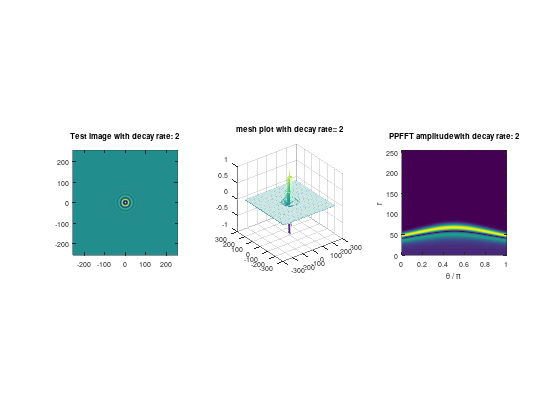

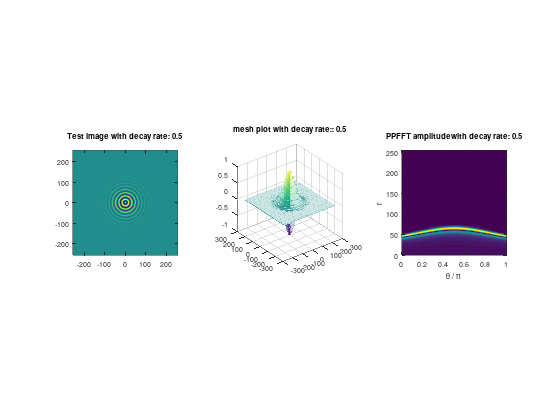

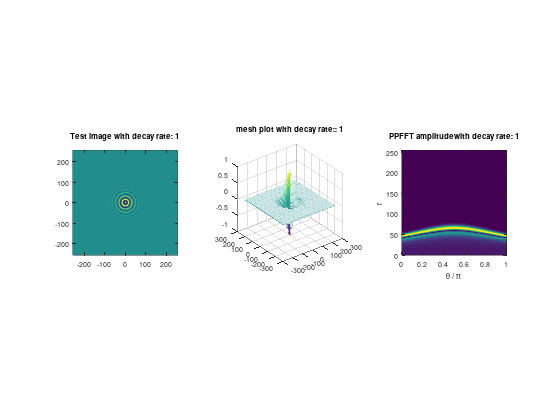

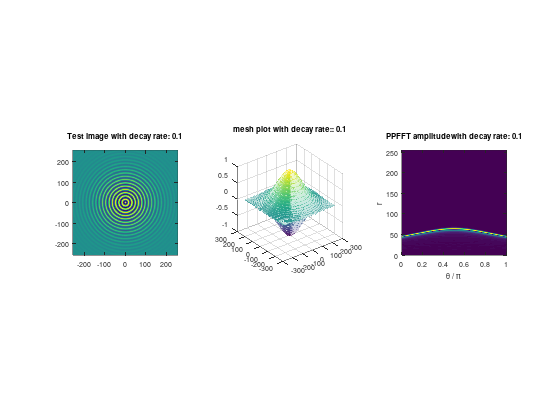

In [6]:
% Function to generate the test image with varying Gaussian decay
function test_image = generate_test_image(N, decay_rate)
    x = [-N:N-1];
    y = x';
    r = sqrt((x).^2 + (y).^2);

    % Generate clean test image with a cosine wave and Gaussian decay
    test_image_clean = cos(2 * pi * r / 16) .* exp(-(decay_rate)*r.^2 / (2 * (N/8)^2));

    % % Add noise to the clean test image to make it interesting
    % noise_level = 0.01; % Adjust the noise level as needed
    % noise = noise_level * randn(size(test_image_clean));
    test_image = test_image_clean;
endfunction

% Function to determine the interesting aspect based on decay rate
function aspect = get_interesting_aspect(decay_rate)
    if decay_rate < 1
        aspect = 'Frequency Concentration';
    elseif decay_rate == 1
        aspect = 'Intermediate';
    else
        aspect = 'High Frequency Concentration';
    end
endfunction

% Vary the rate of Gaussian decay
decay_rates = [0.1, 0.5, 1, 2];
image_size = 256;
oversample = 3; 
t_shuffle = [oversample * 2 * image_size:-1:1];
r_shuffle = [oversample * 2 * image_size:-1:oversample * image_size];

for i = 1:length(decay_rates)
    
    disp(sprintf("Decay rate: %d", decay_rates(i)));
    disp('Interesting Aspect:');
    disp(get_interesting_aspect(decay_rates(i)));

    figure(i)
    I = generate_test_image(image_size, decay_rates(i));

    % Perform PPFFT on the test image with oversampling
    I_ft = PPFFT(I, oversample, oversample);  
    % Extract amplitude information and reshuffle
    I_p = abs(I_ft(r_shuffle, t_shuffle));    
    
    % Display the original image
    subplot(1,3,1);
    imagesc(x,y,I);  
    axis("xy");                
    title(sprintf("Test image with decay rate: %d", decay_rates(i)));       
    pbaspect([1 1 1]);         

    % Create a 3D mesh plot of the original image
    subplot(1,3,2);
    mesh(x, y, I);  
    axis("xy"); 
    title(sprintf("mesh plot with decay rate:: %d", decay_rates(i))); 
    pbaspect([1 1 1]);

    % Display the PPFFT amplitude plot
    subplot(1,3,3);
    imagesc(linspace(0,1,N),[0:N-1],I_p);  
    axis("xy");                 
    title(sprintf("PPFFT amplitudewith decay rate: %d", decay_rates(i)));   
    xlabel("\\theta / \\pi"); 
    ylabel("r"); 
    pbaspect([1 1 1]);

end


### 7.2 Reflection and Discussion

From the above figure the FT in polar coordinates change with high, low, and intermediate decay rates as follows:

### High Decay Rate:
- **Radial Decay:** A high decay rate will result in a faster radial decay in the Fourier Transform. The amplitude of the radial lines in the polar plot corresponding to the cosine wave's frequency components will decrease more rapidly with increasing radial distance from the center.
- **Smoothing Effect:** The Gaussian envelope with a high decay rate will introduce a stronger smoothing effect, causing a more pronounced decrease in amplitude and a broader spread of frequency components in the radial direction.

### Low Decay Rate:
- **Gradual Radial Decay:** A low decay rate will lead to a more gradual radial decay in the Fourier Transform. The amplitude of the radial lines will decrease more slowly with increasing radial distance from the center.
- **Sharper Peaks:** The Gaussian envelope with a low decay rate will introduce a less pronounced smoothing effect, allowing for sharper peaks in the polar plot corresponding to the frequency components of the cosine wave.

### Intermediate Decay Rate:
- **Balanced Radial Decay:** An intermediate decay rate will strike a balance between the fast decay of high rates and the slow decay of low rates. The amplitude of the radial lines will exhibit a moderate decrease with radial distance.
- **Moderate Smoothing:** The Gaussian envelope with an intermediate decay rate will introduce a moderate smoothing effect, resulting in a balance between frequency concentration and radial spread in the polar plot.

This could be summarized as follows:

| Decay Rate                      | Effect on FT in Polar Coordinates                     | Characteristics                                                |
|---------------------------------|------------------------------------------------------ |----------------------------------------------------------------|
| High Decay Rate (2)             | Faster radial decay                                   | Stronger smoothing effect, broader spread of frequency components |
| Low Decay Rate (0.1)            | Gradual radial decay                                  | Sharper peaks, less pronounced smoothing effect                 |
| Intermediate Decay Rate (1, 0.5)| Balanced radial decay                                 | Moderate smoothing effect, balance between concentration and spread |


## 4. Measuring Spacing of Interference Lines

The Fourier transform of an image will depend on the specifics of the Gaussian envelope and the spatial frequency of the underlying wave. Therefore, we can discuss the general behavior.

1. **Radial Symmetry:**
The Fourier transform is expected to exhibit radial symmetry due to the radial symmetry of the Gaussian-decaying wave.

2. **Spatial Frequency Peaks:**
Peaks in the Fourier transform correspond to spatial frequencies in the original image. The radial component of these peaks will be influenced by the spatial frequency ($ \lambda $) of the cosine wave.

3. **Decay in Frequency Domain:**
 The Gaussian envelope in the spatial domain will result in a corresponding decay in the frequency domain. Higher frequencies are expected to be attenuated more than lower frequencies.

4. **Spectrum Width:**
The standard deviation ($ \sigma $) of the Gaussian envelope will influence the width of the frequency spectrum. A larger $ \sigma $ will result in a broader spectrum.


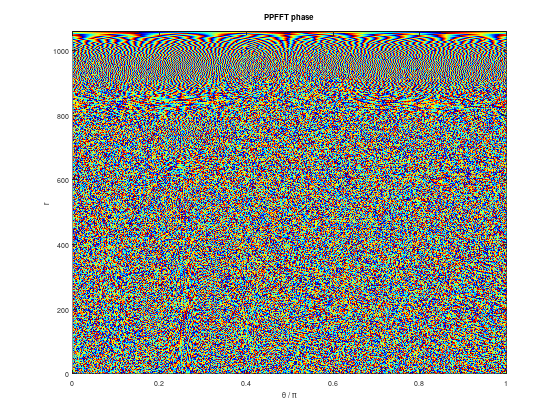

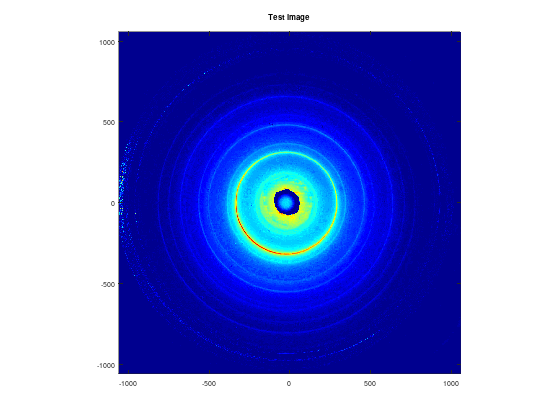

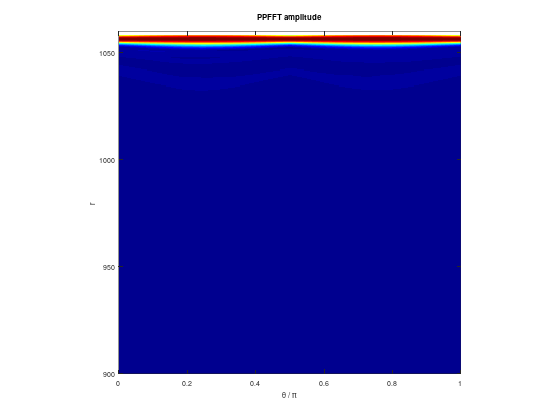

In [48]:
% There are multiple interference images therefore, please choose the image from this specified path 
I = imread('/work/5P10/Images/');  


Ns = size(I);                       % Get the size of the image
N = Ns(1);                          % Extract the size along the first dimension (assuming square image)
res = [Ns(1), Ns(2)];               % Create a resolution vector
I = I(1:min(res), round(min(res)/4) :min(res)+ round(min(res)/4));  % Crop and subsample the image
% I = rgb2gray(I);                  % (Optional) Convert the image to grayscale
oversample = 2;                     % Set oversampling factor for PPFFT (useful range = 1..5)

t_shuffle = [oversample * 2 * N:-1:1];  % Create a time-shuffling vector
r_shuffle = [oversample * 2 * N:-1:oversample * N];  % Create a radius-shuffling vector

figure;
imagesc([-N:N],[-N:N],I);  % Display the image with coordinates centered around the origin
axis("xy");                % Set axis scaling to be equal along both axes
title("Test image");       % Set the title of the plot
colormap('jet');           % Set the colormap to 'jet'
pbaspect([1 1 1]);          % Set the aspect ratio of the plot

I_ft = PPFFT(I, oversample, oversample);  % Perform PPFFT on z with oversampling
I_p = abs(I_ft(r_shuffle, t_shuffle));    % Extract amplitude information and reshuffle

figure;
imagesc(linspace(0,1,N),[0:N-1],I_p);  % Display the PPFFT amplitude plot
axis("xy");                 
title("PPFFT amplitude");   
xlabel("\\theta / \\pi"); 
ylabel("r"); 
ylim([900, 1060]);           % Set the y-axis limits
colormap('jet');            % Set the colormap to 'jet'
pbaspect([1 1 1]);          % Set the aspect ratio of the plot

I_p=angle(I_ft(r_shuffle,t_shuffle));
I_p += ifelse(I_p<0,pi,0);  % Fix up the phase for arctan() to 0..2*pi

figure;
imagesc(linspace(0,1,N),[0:N-1],I_p);  % Display the PPFFT phase plot
axis("xy"); 
colormap('jet');            % Set the colormap to 'jet'
title("PPFFT phase"); 
xlabel("\\theta / \\pi"); 
ylabel("r");


From the above result I was unable to conclude the spacing between the rings due to reasons below:

**Lack of Clear Peaks:**
The absence of distinct peaks in the FT suggests that the spatial frequencies corresponding to the rings may not be well-defined or are obscured by noise.

**Challenges Due to Noise:**
The presence of noise in the image complicates the analysis, making it challenging to separate true signal information from unwanted artifacts.

**Complexity of Ring Patterns:**
The existence of numerous closely spaced rings adds complexity to the ring patterns, making it difficult to identify individual frequencies.


## References

[1] A. Averbuch, R.R. Coifman, D.L. Donoho, M. Elad, &amp; M. Israeli. (2005, December 27). Fast and accurate polar fourier transform. Applied and Computational Harmonic Analysis. https://elad.cs.technion.ac.il/wp-content/uploads/2018/02/30_PolarFFT_ACHA.pdf 